
# Mechanics

You should produce a Jupyter notebook in answer to this assignment. You need to submit this notebook electronically as described below.

Place your notebook in a directory called iamlans and submit this directory using the submit command on a DICE machine. The format is:

submit iaml 4 iamlans

You can check the status of your submissions with the show_submissions command.

Late submissions: The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

Collaboration: You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

# Supervised Learning


In this project, we will apply all the machine learning classifiers on the given dataset. We will perform exploratory data analysis, visualisation and, finally, we learn how to perform classification tasks using Naive Bayes,Decision Trees, K-Nearest Neighbors, Linear SVC , Support Vector Classifier, Random Forest, Gradeint Decent, and Ada Boost Classifier,etc. For this, we will use some python packages and scikit-learn package (sklearn): a machine learning library for Python which works with numpy array, and pandas DataFrame objects.

Please Note: If you get confused, refer to the documentation and just ctrl+f for the object concerned:

- Scikit-learn API documentation
- Seaborn API documentation
- Matplotlib Pyplot documentation
- Pandas API documentation
- Numpy documentation


# Imports
In this project, you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [116]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import matplotlib
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
import tools as t
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import MiniBatchKMeans

from sklearn.pipeline import Pipeline

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

# plt.style.use('ggplot')
# matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# %load_ext autoreload 
# %autoreload 2
# %matplotlib inline


#### Clarification:

    The %matplotlib inline command is a special ipython built in magic command which forces the matplotlib plots to be rendered within the notebook.



# Description of the datasets


The Dataset is based on 4 small preprocessed datasets:
It contains 2225 documents

**classes.txt:** document id and the class id

**docs.txt: ** Description of the classes

**mtx.mtx:** 
It has three columns:

    column 0: the id of the term

    column 1: the id of the document

    column 2: counts/frequency

**terms.txt:** each row corresponds to a word/term (id is obviously the row number)

**Note: **Execute the cell below to load the csv into in a pandas DataFrame object.


### Load Dataset in Pandas DataFrame

In [2]:
# Loading dataset

#Column names for our dataset 
column_names = ['term_id','doc_id', 'counts']

#Reading Dataset into Pandas Dataframe
mtx_data = pd.read_csv( "./dataset/mtx.mtx", sep="\s+", names=column_names)
terms_data    = pd.read_csv("./dataset/terms.txt", sep="\s+", names = ['words'], encoding='utf-8')
classes_data  = pd.read_csv( "./dataset/classes.txt", sep="\s+", names=list(['doc_id', 'class_id']))


### Get Your Data in numpy arrays

In [51]:

data_array = np.asarray(mtx_data[mtx_data.columns])
classes_array = np.asarray(classes_data[classes_data.columns])
Columns = np.array(list(terms_data.words))

# array of zeros
zero_arr = np.zeros((2225,1), dtype=int)
i=0
for col in Columns:
    classes_data[col] = zero_arr
    if i==2225:
        break
    i += 1

for i in range(classes_array.shape[0]):
    
    #if (i+1)%10 == 0:
    print "i:",i,
        #break
    
    doc_id = classes_array[i, 0]        # Getting Document id
    mask = data_array[:,1]==doc_id      # Getting indices where condition holds 
                                        # mask is boolean array
    if sum(mask) > 0:                   # Not empty list returned
        
        terms_ids = data_array[mask, 0]
        arr = np.array(terms_ids, dtype=int)
        words = list(Columns[list(arr-1)])
        #l += len(words)
        for word in words:              #Placing 1 on the each occurance of each word in each document
            
            #classes_data.set_value(i, unicode(word), 1)
            
            # some characters do not lie in ascii(128) so need to cast them in unicode
            classes_data.ix[i][unicode(word)]= 1 

print "No.of NaN Entries:",classes_data.isnull().sum().sum()


In [23]:
classes_data.head(10)

,doc_id,class_id,ad,sale,boost,time,warner,profit,quarterli,media,...,wholli,exploit,commerci,synergi,outright,evid,silvio,berlusconi,sputter,rome
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Loading Pandas DataFrames into numpy arrays

## Saving DataFrame to .CSV File

In [21]:
classes_data.to_csv("Data_set.csv", sep="\t", encoding='utf-8')

We have now loaded the data. Let's get a feeling of what the data looks like by using the head() method.

In [22]:
classes_data.head(5) # Display the 5 first rows of the dataframe

,doc_id,class_id,ad,sale,boost,time,warner,profit,quarterli,media,...,wholli,exploit,commerci,synergi,outright,evid,silvio,berlusconi,sputter,rome
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In Exploratory Data Analysis, we plot graphs and charts to visualize how our data looks like. This is practically very helpful to get understanding about the data, relation among different features, how they affect each other, and which attributes are vital to build a learning model.

##### Histogram

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. An example of a histogram, and the raw data it was constructed from, is shown below:

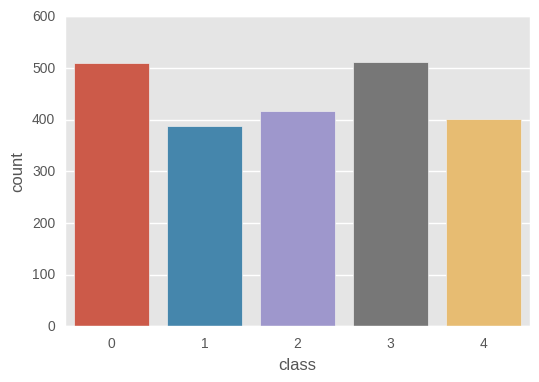

In [24]:
ax = sns.countplot(x='class_id', data=classes_data)
ax.set_xticklabels(['0', '1','2','3','4'])
ax.set_xlabel('class')
plt.show()

# Visualisation

Now we want to get a feeling for how the presence or absence of some specific terms could affect the outcome. 

## Lets Visualize the data

**Note: ** Here we are using seaborn pairplot function to see each across all other features

In [27]:
# sns.pairplot(classes_data, hue="class_id")

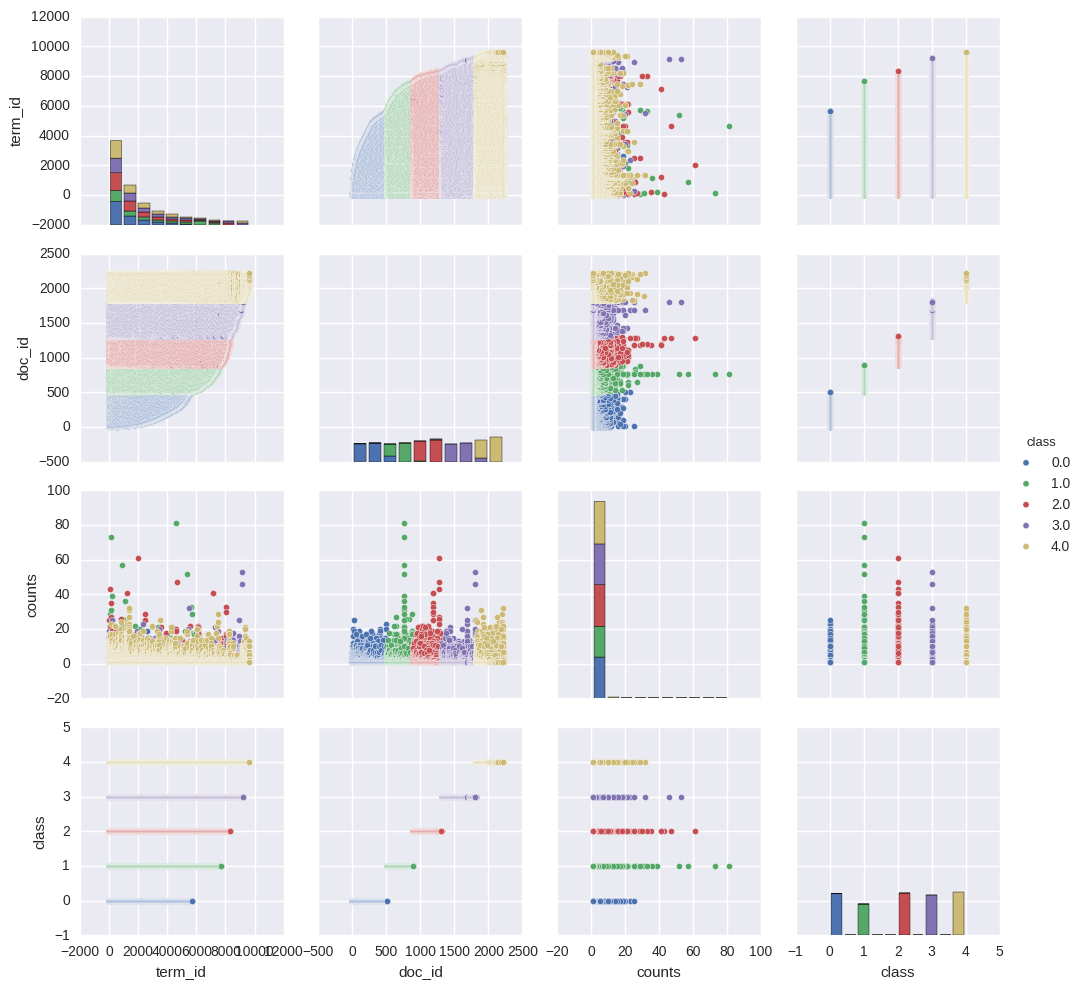

In [28]:
sns.pairplot(classification_data, hue="class")

Using seaborn, produce one figure with three countplots, one for each of the frequency variables for the words make.

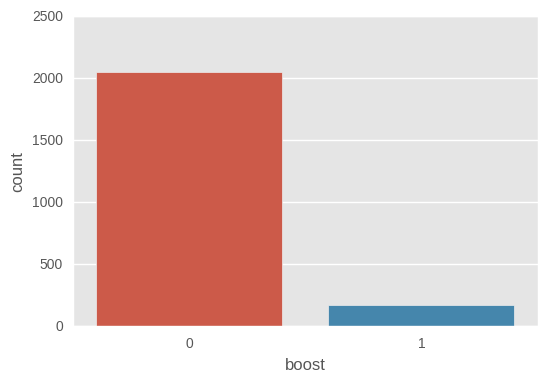

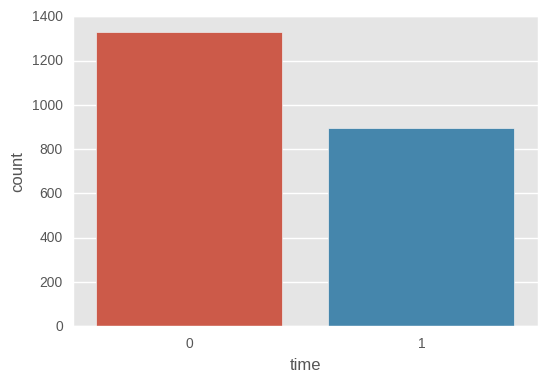

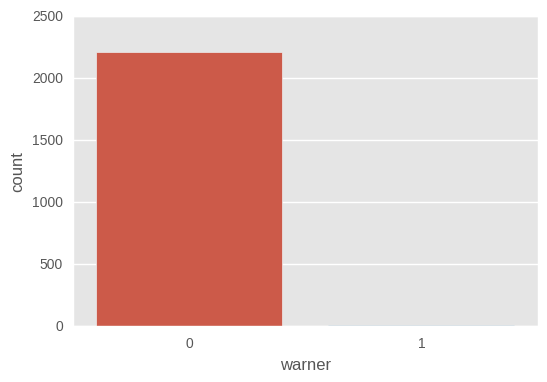

In [54]:
ax = sns.countplot(x='boost', data=classes_data)
plt.show()

ax = sns.countplot(x='time', data=classes_data)
plt.show()

ax = sns.countplot(x='warner', data=classes_data)
plt.show()

Repeat the above but split the bars showing the proportion of terms that belong to class 0/1/2/3/4. Hint: This only requires you to use the hue input argument to use different colours for the 'class_id' variable.

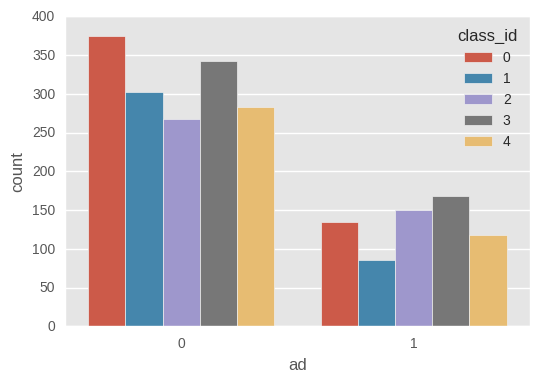

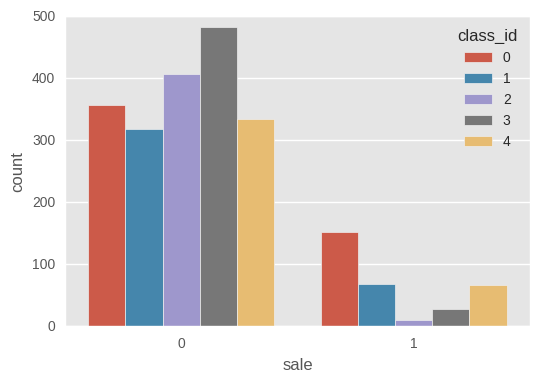

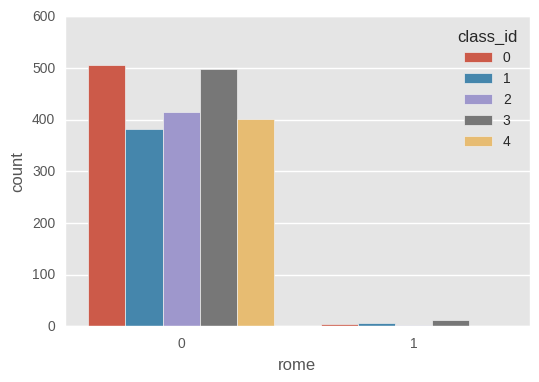

In [50]:
# Your code goes here
ax = sns.countplot(x='ad', hue='class_id', data=classes_data)
plt.show()

ax = sns.countplot(x='sale', hue='class_id', data=classes_data)
plt.show()

ax = sns.countplot(x='rome', hue='class_id', data=classes_data)
plt.show()

# Applying Classifiers

Now we are in a position to apply all machine learning classifiers we studied in this course over the cleaned data. As discussed above, we'll prefer to use sklearn library in python which provides us a quality framework to apply classifiers with great efficiency. Lets discuss & apply all classifiers one by one. 

### Splitting Data into Trainig and Testing parts
We are splitting data into testing and training sets.
**Training Set:** Used to build the model
**Testing Set:**  Used to test the model

In [115]:
arr = np.asarray(classes_data[classes_data.columns])
#Check the shape of new array
print arr.shape
idx = np.arange(1,2228, 1)

# I need to replace first index entry '1' with '0' because I need first column not 2nd from array
idx[0] = 0

# Splitting data into two parts
# 90% ---> Training Data
# 10% ---> Testing Data
Xtrain, Xtest, ytrain, ytest = train_test_split(arr[:, idx],arr[:,1],train_size = 0.9, test_size=0.1, random_state=0)

#Print Shape of splitted Data
print Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                                              

# Find if any 'nan' value is present
print np.isnan(Xtrain).sum()!=0,np.isnan(Xtest).sum()!=0,np.isnan(ytrain).sum()!=0,np.isnan(ytest).sum()!=0 

(2225, 2228)
(2002, 2227) (2002,) (223, 2227) (223,)
False False False False


# Multinomial Naive Bayes classification


Given the transformed dataset, we now wish to train a Naïve Bayes classifier to distinguish each term belonging to class (0,1,2,3,4) from other terms in all documents by fitting a distribution of the number of occurrences of each word for all documents. Read about the Naive Bayes classifier and the underlying assumption if you are not already familiar with it. In this project we'll firts focus on the Multinomial Naive Bayes classifier.

We will make use of the MultinomialNB class in sklearn. Check out the user guide description and documentation to familiarise yourself with this class.

All classifiers in sklearn implement a fit() and predict() method. The first learns the parameters of the model and the latter classifies inputs. For a Naive Bayes classifier, the fit() method takes at least two input arguments X and y, where X are the input features and y are the labels associated with each example in the training dataset (i.e. targets).

As a first step we extract the input features and targets from the DataFrame. Now we want to train a Multinomial Naive Bayes classifier. Initialise a MultinomialNB object and fit the classifier using the X and y arrays extracted in the cell above.

#### Training

In [34]:
# Creating Multinomial Naive Bayes Object
classifier = MultinomialNB()

# Now we are building our model
classifier.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Testing

In [35]:
# Predicting the Outcome
ypredicted = classifier.predict(Xtest)

#Calculating Mean Absolute Error which tells us how much our model is misclassifying
mae = mean_absolute_error(ytest, ypredicted)

print "Accuracy = ", np.sum(ypredicted==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.955156950673
Mean Absolute Error: 0.0627802690583


### Confusion Matrix

In [36]:

t.print_confusion_matrix(ypredicted.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,51,2,3,0,0,56
1,1,32,1,0,0,34
2,0,0,47,1,1,49
3,0,0,0,50,0,50
4,0,0,0,1,33,34
All,52,34,51,52,34,223


## Naive Bayes Classifier
Naive Bayes, also known as Naive Bayes Classifiers are classifiers with the assumption that features are **statistically independent** of one another. 
Unlike many other classifiers which assume that, for a given class, there will be some correlation between features, naive Bayes explicitly models the features as conditionally independent given the class. 
While this may seem an overly simplistic (naive) restriction on the data, in practice naive Bayes is competitive with more sophisticated techniques and enjoys some theoretical support for its efficacy.

In spite of the great advances of the Machine Learning in the last years, it has proven to not only be simple but also fast, accurate and reliable. It has been successfully used for many purposes, but it works particularly well with natural language processing (NLP) problems.

#### Training

In [37]:
#Create a Gaussian Classifier
gb = GaussianNB()

# Train the model using the training sets 
gb.fit(Xtrain, ytrain)


GaussianNB(priors=None)

#### Testing

In [38]:

#Predict Output 
ypredicted= gb.predict(Xtest)

#Calculating Mean Absolute Error which is how much error is in classification
mae = mean_absolute_error(ytest, ypredicted)

# Calculating how good is our model is performing on unknown examples
print "Accuracy = ", np.sum(ypredicted==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.762331838565
Mean Absolute Error: 0.515695067265


#### Confusion Matrix

In [39]:
t.print_confusion_matrix(ypredicted.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,50,2,1,0,3,56
1,6,19,1,1,7,34
2,12,0,33,1,3,49
3,1,5,2,42,0,50
4,3,2,2,1,26,34
All,72,28,39,45,39,223


## Support Vector Classifier

**“Support Vector Machine”** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. 
However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
Then, we perform classification by finding the hyper-plane that differentiate the all classes very well.

#### Cross Validation for SVC

In [124]:
# from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(Xtrain, ytrain)
# clf.score(Xtest, ytest)  

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(classifier,arr[:, idx],arr[:,1] , cv=10)
metrics.accuracy_score(arr[:,1], predicted) 

0.93573033707865172

### K-Fold Cross Validation

Advantages:
- All observations are used for both training and 
validation. Each observation is used for 
validation exactly once

- Non exhaustive: More tractable than leave-p-out

In [133]:
X_folds = np.array_split(Xtrain, 3)
y_folds = np.array_split(ytrain, 3)
scores = list()
best_Xtrain = []
best_ytrain = []
best_Xtest = []
best_ytest = []

best_score=0.0

for k in range(3):
     # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    score = clf.fit(X_train, y_train).score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_Xtrain = X_train
        best_ytrain = y_train
        best_Xtest = X_test
        best_ytest = y_test
    scores.append(score)
    
print(scores)

[0.99850299401197606, 0.99850074962518742, 0.992503748125937]


### Best Score

In [131]:
clf.fit(best_Xtrain, best_ytrain).score(best_Xtest, best_ytest)

0.99850299401197606

## Decision Tree Classifier

In [73]:
from sklearn import tree

#Creating Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.995515695067
Mean Absolute Error: 0.00448430493274


#### Confusion Matrix

In [57]:
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,56,0,0,0,0,56
1,1,33,0,0,0,34
2,0,0,49,0,0,49
3,0,0,0,50,0,50
4,0,0,0,0,34,34
All,57,33,49,50,34,223


## K Neighbors Classifier

Now we want to explore the effect of the k parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try 5, 10, 50, 100, 200, 500, 1000, 1500 and 2000 and test the classifier on the test set. How does the k parameter effect the results? Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the base rate again.

### Cross Validation

In [74]:
# Your code goes here
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

In [75]:
def trainAndScoreKnnClassifier(k, trainData, trainTargets, testData, testTargets):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    #print "knn classifier with k: " + str(k)
    #print "training score:"
    trainingScore = classifier.score(trainData, trainTargets)
    #print trainingScore
    #print "testing score:"
    testingScore = classifier.score(testData, testTargets)
    #print testingScore
    return k, trainingScore, testingScore

In [76]:
scoreDict = dict()
for k in ks:
    curK, curTrainingScore, curTestingScore = trainAndScoreKnnClassifier(k, Xtrain, ytrain, Xtest, ytest)
    scoreDict[k] = {
        "trainingScore": curTrainingScore,
        "testingScore": curTestingScore
    }

In [77]:
scoreDict

{5: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.99800199800199796},
 10: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.99700299700299699},
 50: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.9985014985014985},
 100: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.99700299700299699},
 200: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.99400599400599399},
 500: {'testingScore': 0.99551569506726456,
  'trainingScore': 0.99400599400599399},
 1000: {'testingScore': 0.6547085201793722,
  'trainingScore': 0.60289710289710285},
 1500: {'testingScore': 0.47533632286995514,
  'trainingScore': 0.45654345654345652},
 2000: {'testingScore': 0.22421524663677131,
  'trainingScore': 0.23026973026973027}}



**We notice** that as the k increases the training score is decreasing, which is expected because the best prediction to be made for the training instances is the one nearest neighbor.

But more importantly we care for testing, unseen, data. We see that the testing score climbs up and then starts falling again with a maximum at k=2000 even though the k=100 is much more computationally preferable and the classification accuracy is not bad.


In [78]:
#Creating Knn Classifier Instance
neigh = KNeighborsClassifier(n_neighbors=200)

neigh.fit(Xtrain, ytrain)


ypredict = neigh.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.995515695067
Mean Absolute Error: 0.00448430493274


#### Confusion Matrix

In [79]:
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,56,0,0,0,0,56
1,1,33,0,0,0,34
2,0,0,49,0,0,49
3,0,0,0,50,0,50
4,0,0,0,0,34,34
All,57,33,49,50,34,223


### Plotting k-value Vs Accuracy

Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. 
**Can you conclude anything from observing the plot?**
**Yes,** we notice that initially when k-value is smaller, accuracy is lower but when k-value increases accuracy starts increasing untill reaching a point where with further increase in k-value leads to fall in accuracy.

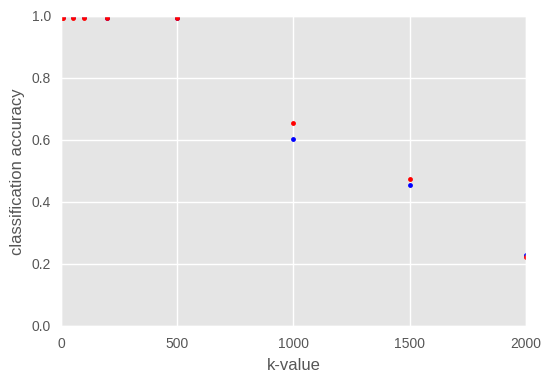

In [86]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.axis([0, 2000, 0, 1])
plt.plot(scoreDict.keys(), [x['trainingScore'] for x in scoreDict.values()], 'b.')
plt.plot(scoreDict.keys(), [x['testingScore'] for x in scoreDict.values()], 'r.')
plt.xlabel('k-value')
plt.ylabel('classification accuracy')
plt.hold(False)

plt.show()


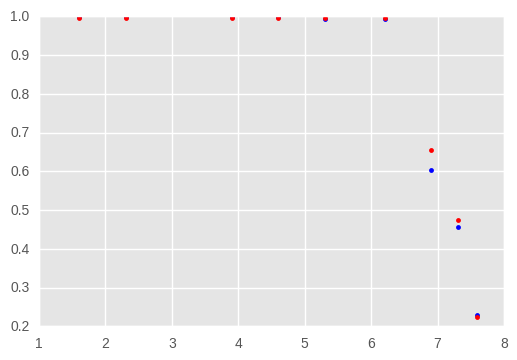

In [87]:
# plotting again here with log x axis to show the differences at the first small k values
fig = plt.figure()
plt.hold(True)
plt.plot(np.log(scoreDict.keys()), [x['trainingScore'] for x in scoreDict.values()], 'b.')
plt.plot(np.log(scoreDict.keys()), [x['testingScore'] for x in scoreDict.values()], 'r.')
plt.hold(False)
plt.show()



Your answer goes here

We notice that the training accuracy is continuously falling as the knn gets bigger while the testing accuracy rises a little bit and then falls, it has a maximum value


Select best value for k from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set. Then plot the confusion matrix for a 5-nearest neighbor classifier. **What do you observe?**

In [88]:
testingScores = [x['testingScore'] for x in scoreDict.values()]

In [89]:
bestK = scoreDict.keys()[np.argmax(testingScores)]
bestK

100

In [91]:
def whatClassesAreResponsibleForEachClassification(confusionMatrix):
    return confusionMatrix / np.sum(confusionMatrix, axis=0)

In [92]:
def howEachClassHasBeenClassified(confusionMatrix):
    return (confusionMatrix.T / np.sum(confusionMatrix, axis=1)).T

In [93]:
# Your code goes here
def getKnnPredictions(k, trainData, trainTargets, testData):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    return classifier.predict(testData)

In [94]:
def getInvertedNormalizedConfusionMatrix(realTargets, predictions):
    return whatClassesAreResponsibleForEachClassification(
        confusion_matrix(y_true=realTargets, y_pred=predictions)
    )

In [95]:
def getNormalizedConfusionMatrix(realTargets, predictions):
    return howEachClassHasBeenClassified(
        confusion_matrix(y_true=realTargets, y_pred=predictions)
    )

In [96]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
availableClasses = np.unique(ytest)

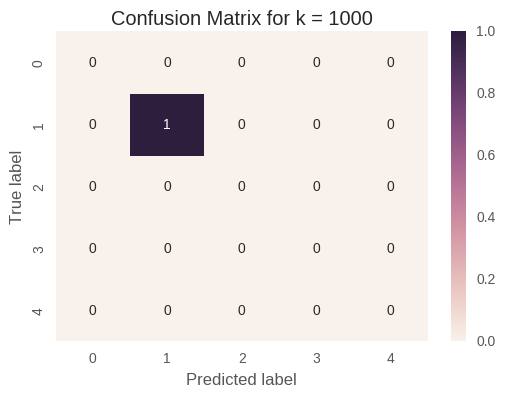

In [105]:
k = 1000

plot_confusion_matrix(getInvertedNormalizedConfusionMatrix(
        realTargets=ytest,
        predictions=getKnnPredictions(k = k, trainData=Xtrain, trainTargets=ytrain, testData=Xtest)),
    classes = availableClasses, title='Confusion Matrix for k = %d' % k)

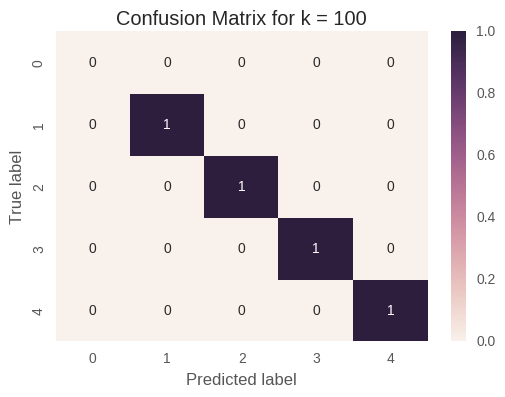

In [106]:
k = bestK

plot_confusion_matrix(getInvertedNormalizedConfusionMatrix(
        realTargets=ytest,
        predictions=getKnnPredictions(k = k, trainData=Xtrain, trainTargets=ytrain, testData=Xtest)),
    classes = availableClasses, title='Confusion Matrix for k = %d' % k)

**NOTE:** Here the problem is imbalanced as we see from the histogram plotted above. The class N has large prior. We have 3 times more N instances than we do EI and IE instances. This means that as the k grows bigger the N will tend to be the majority of the instances and we are more likely to predict an instance to be of class N.

In [107]:
def trainAndLogLossKnnClassifier(k, trainData, trainTargets, testData, testTargets):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    #print "knn classifier with k: " + str(k)
    #print "training score:"
    trainingLogLoss = log_loss(y_true = trainTargets, y_pred = classifier.predict_proba(trainData))
    #print trainingScore
    #print "testing score:"
    testingLogLoss = log_loss(y_true = testTargets, y_pred = classifier.predict_proba(testData))
    #print testingScore
    return k, trainingLogLoss, testingLogLoss

In [108]:
logLossDict = dict()

for k in ks:
    curK, curTrainingLogLoss, curTestingLogLoss = trainAndLogLossKnnClassifier(
        k, Xtrain, ytrain, Xtest, ytest
    )
    
    logLossDict[k] = {
        "trainingLogLoss": curTrainingLogLoss,
        "testingLogLoss": curTestingLogLoss
    }
    
logLossDict

{5: {'testingLogLoss': 0.15688369281408118,
  'trainingLogLoss': 0.0052536191714077996},
 10: {'testingLogLoss': 0.16482705057004671,
  'trainingLogLoss': 0.0078119882718811146},
 50: {'testingLogLoss': 0.196335216833846,
  'trainingLogLoss': 0.03079138250153704},
 100: {'testingLogLoss': 0.23899869197804807,
  'trainingLogLoss': 0.059988778221925665},
 200: {'testingLogLoss': 0.30895066359652801,
  'trainingLogLoss': 0.11950920731259643},
 500: {'testingLogLoss': 0.38037747348100792,
  'trainingLogLoss': 0.34505927842779821},
 1000: {'testingLogLoss': 0.90372773675457208,
  'trainingLogLoss': 0.90860384329536714},
 1500: {'testingLogLoss': 1.3091928448627355,
  'trainingLogLoss': 1.3140689514035306},
 2000: {'testingLogLoss': 1.5968749173145151,
  'trainingLogLoss': 1.601751023855311}}

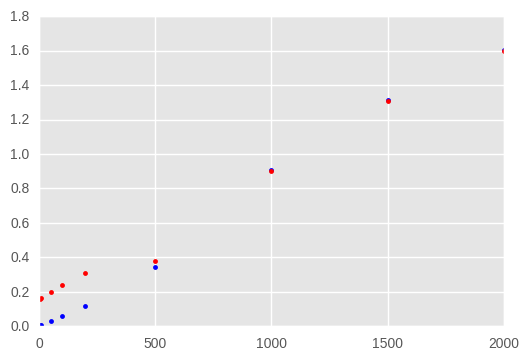

In [109]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.plot(logLossDict.keys(), [x['trainingLogLoss'] for x in logLossDict.values()], 'b.')
plt.plot(logLossDict.keys(), [x['testingLogLoss'] for x in logLossDict.values()], 'r.')
plt.hold(False)
plt.show()


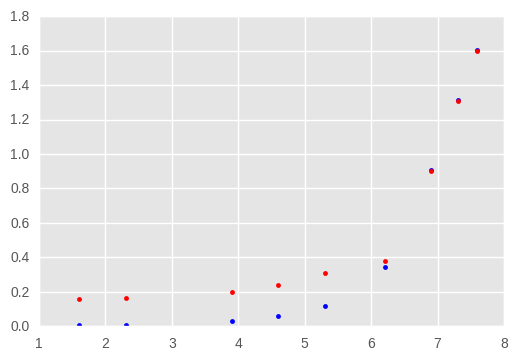

In [110]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.plot(np.log(logLossDict.keys()), [x['trainingLogLoss'] for x in logLossDict.values()], 'b.')
plt.plot(np.log(logLossDict.keys()), [x['testingLogLoss'] for x in logLossDict.values()], 'r.')
plt.hold(False)
plt.show()



The classification accuracy is the same for both classifiers because both would classify the one test point as correct and therefore both would have 1/1 = 100% classification accuracy.

Yes indeed the classifier with probability 0.99 is better than the classifier with probability 0.55 because the classifier must be more sure that this one test point is the correct one (since it is classifying it correctly)

From the plots above we notice that for training and testing data as k is small the certainty of the classifier for the testing data is quite low in comparison with the training data. While the k is getting larger the certainty (log loss) is the same for classifying training data or testing data.

Now is interesting to notice that for k=50 the classifier has the minimum log loss (or the maximum certainty).

In our case because the K=100 and k=500 have similar accuracy but the k=100 has lower log-loss probability we would prefer the kNN classifier with k=100

The kNearestNeighbors Classifier is a generative model, you can assign probabilities according to the neighbors.

While the SVM classifier is a discriminative model which only describes the boundary between the two classes. We cannot have probabilities for it

## Linear SVC Classifier

In [111]:
#Creating Instance of Linear SVC Classifier
lscv = LinearSVC()

#Training the model
lscv.fit(Xtrain, ytrain)

# Testing the model
ypredict = lscv.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.757847533632
Mean Absolute Error: 0.242152466368


#### Confusion Matrix

In [112]:
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())

Predicted,0,1,2,4,All
Actual,,,,,
0,56,0,0,0,56
1,3,30,1,0,34
2,0,0,49,0,49
3,0,0,7,43,50
4,0,0,0,34,34
All,59,30,57,77,223


## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=8)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae

Accuracy =  0.910313901345
Mean Absolute Error: 0.165919282511


#### Confusion Matrix

In [114]:
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,55,0,0,1,0,56
1,3,23,0,6,2,34
2,1,0,46,2,0,49
3,0,0,0,50,0,50
4,1,0,1,3,29,34
All,60,23,47,62,31,223


## Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae

Accuracy =  0.995515695067
Mean Absolute Error: 0.00448430493274


#### Confusion Matrix

In [65]:
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,56,0,0,0,0,56
1,1,33,0,0,0,34
2,0,0,49,0,0,49
3,0,0,0,50,0,50
4,0,0,0,0,34,34
All,57,33,49,50,34,223


## Ada Boost Classifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae

Accuracy =  0.627802690583
Mean Absolute Error: 0.520179372197


In [72]:
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Predicted,0,3,4,All
Actual,,,,
0,56,0,0,56
1,1,33,0,34
2,0,49,0,49
3,0,50,0,50
4,0,0,34,34
All,57,132,34,223
